# Neural Network from Scratch - Classify Letters A, B, C
This notebook implements a simple neural network from scratch (no deep learning libraries) to classify letters **A, B, C** represented as binary pixel patterns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Define dataset (A, B, C patterns)

In [2]:
A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,0,0,1,0],
    [1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [0,1,1,1,0]
]).flatten()

X = np.array([A, B, C])   # Input data (3 samples, 30 features each)
y = np.array([
    [1,0,0],  # Label for A
    [0,1,0],  # Label for B
    [0,0,1]   # Label for C
])

## 2. Define helper functions

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

## 3. Initialize network parameters

In [4]:
input_size = 30   
hidden_size = 10  
output_size = 3 

np.random.seed(42)  
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

## 4. Training (Forward + Backpropagation)

In [5]:
epochs = 5000
lr = 0.5
losses = []

for epoch in range(epochs):

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)


    loss = np.mean((y - a2) ** 2)
    losses.append(loss)


    d_a2 = (a2 - y) * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)


    W1 -= lr * d_W1
    b1 -= lr * d_b1
    W2 -= lr * d_W2
    b2 -= lr * d_b2

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2512
Epoch 500, Loss: 0.0010
Epoch 1000, Loss: 0.0004
Epoch 1500, Loss: 0.0003
Epoch 2000, Loss: 0.0002
Epoch 2500, Loss: 0.0001
Epoch 3000, Loss: 0.0001
Epoch 3500, Loss: 0.0001
Epoch 4000, Loss: 0.0001
Epoch 4500, Loss: 0.0001


## 5. Plot training loss

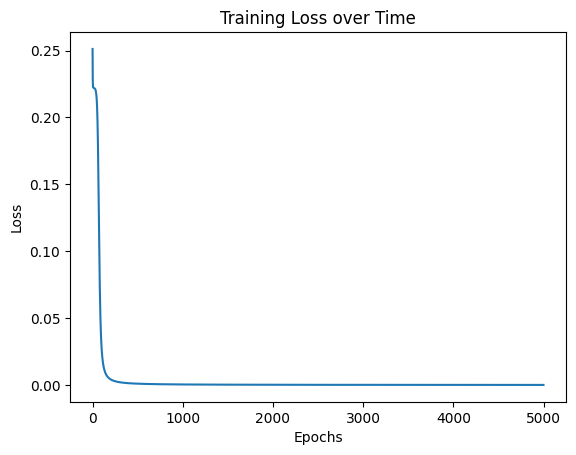

In [6]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()

## 6. Testing & Visualization

True: A, Predicted: A, Probabilities: [[0.99  0.008 0.007]]


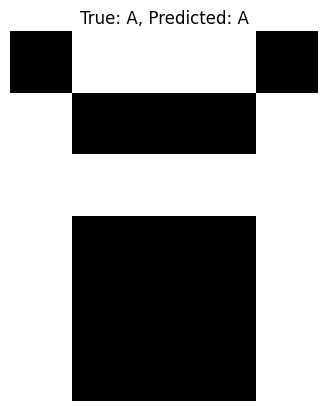

True: B, Predicted: B, Probabilities: [[0.007 0.99  0.008]]


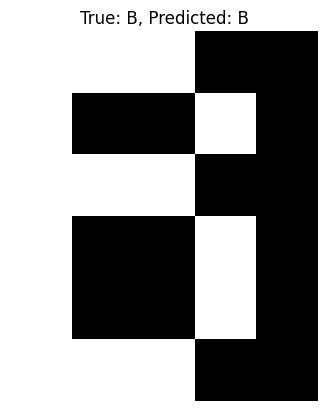

True: C, Predicted: C, Probabilities: [[0.007 0.007 0.99 ]]


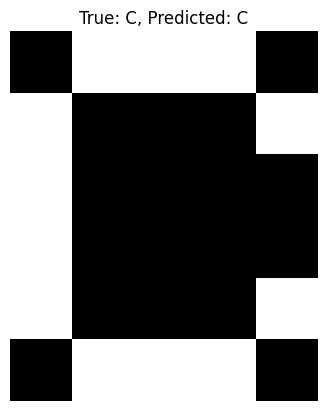

In [7]:
def predict(letter):
    z1 = np.dot(letter, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.argmax(a2), a2

letters = [A, B, C]
names = ["A", "B", "C"]

for i, letter in enumerate(letters):
    pred_class, probs = predict(letter)
    print(f"True: {names[i]}, Predicted: {names[pred_class]}, Probabilities: {probs.round(3)}")
    
    # Show image
    plt.imshow(letter.reshape(6,5), cmap="gray")
    plt.title(f"True: {names[i]}, Predicted: {names[pred_class]}")
    plt.axis("off")
    plt.show()